In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
sys.path.insert(0, '/Users/zhangming/Desktop/paper/code/halo_mass/')
import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt

from halomod import TracerHaloModel
import halomod
import hmf
print("halomod version: ", halomod.__version__)
print("hmf version:", hmf.__version__)

halomod version:  2.1.0
hmf version: 3.4.4


In [2]:
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)

snap=st.SnapshotTools('/Users/zhangming/Desktop/paper/code/halo_mass/data/snapshot_064','HDF5')
halo=ht.HaloTools('/Users/zhangming/Desktop/paper/code/halo_mass/data/fof_subhalo_tab_064.hdf5','SubFind')
gal=gt.GalaxyTools('/Users/zhangming/Desktop/paper/code/halo_mass/data/galaxies.hdf5','SHARK')
tree=mtt.TreeTools('/Users/zhangming/Desktop/paper/code/halo_mass/data/trees_L62pt5_N270.hdf5','SubFind')

snap.ReadSnapshot()
halo.ReadHaloCatalogue()
gal.ReadGalaxyCatalogue()
tree.ReadMergerTreeCatalogue()

Reading data from /Users/zhangming/Desktop/paper/code/halo_mass/data/snapshot_064.hdf5
Reading data from /Users/zhangming/Desktop/paper/code/halo_mass/data/galaxies.hdf5
<KeysViewHDF5 ['bh_accretion_rate_hh', 'bh_accretion_rate_sb', 'cnfw_subhalo', 'cooling_rate', 'descendant_id_galaxy', 'id_galaxy', 'id_halo', 'id_halo_tree', 'id_subhalo', 'id_subhalo_tree', 'l_x', 'l_y', 'l_z', 'lambda_subhalo', 'm_bh', 'matom_bulge', 'matom_disk', 'mean_stellar_age', 'mgas_bulge', 'mgas_disk', 'mgas_metals_bulge', 'mgas_metals_disk', 'mhot', 'mhot_metals', 'mlost', 'mlost_metals', 'mmol_bulge', 'mmol_disk', 'mreheated', 'mreheated_metals', 'mstars_bulge', 'mstars_bulge_diskins_assembly', 'mstars_bulge_mergers_assembly', 'mstars_burst_diskinstabilities', 'mstars_burst_mergers', 'mstars_disk', 'mstars_metals_bulge', 'mstars_metals_bulge_diskins_assembly', 'mstars_metals_bulge_mergers_assembly', 'mstars_metals_burst_diskinstabilities', 'mstars_metals_burst_mergers', 'mstars_metals_disk', 'mvir_hosthalo

19683000 24590 27011 29181


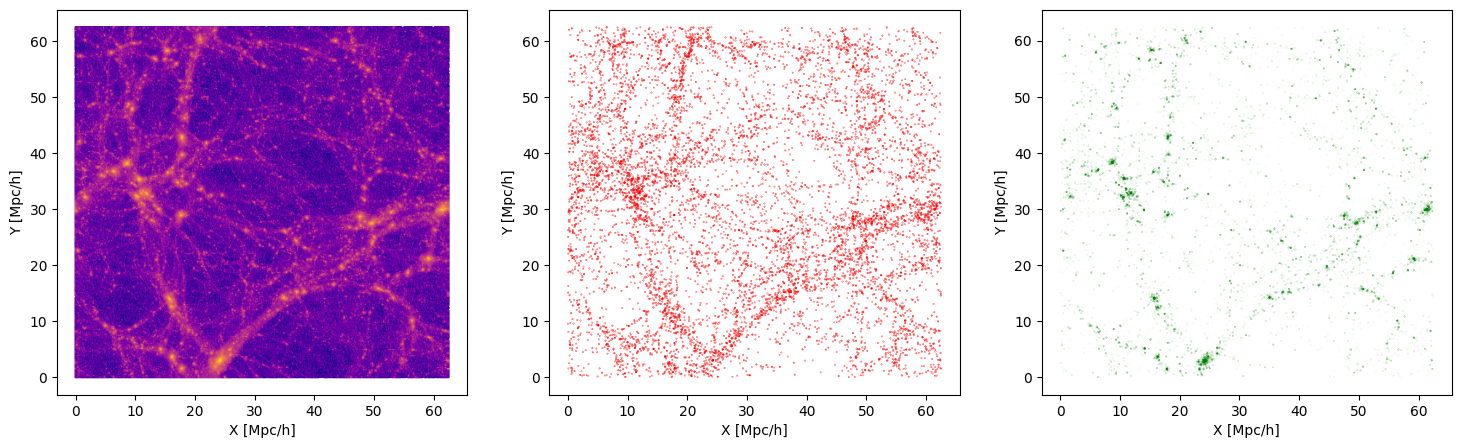

In [3]:
ipick=np.logical_and(snap.pos[:,2]<40,snap.pos[:,2]>20)  # 0-100
jpick=np.logical_and(halo.GroupPos[:,2]<40,halo.GroupPos[:,2]>20)
kpick=np.logical_and(gal.pos[:,2]<40,gal.pos[:,2]>20)
lpick=np.logical_and(halo.SubPos[:,2]<40,halo.SubPos[:,2]>20)

print(len(ipick), len(jpick), len(kpick), len(lpick))

### Snapshot
fig=plt.figure(figsize=(18,5))
ax=fig.add_subplot(1,3,1)
ax.set_xlabel("X [Mpc/h]")
ax.set_ylabel("Y [Mpc/h]")
ax.hexbin(snap.pos[ipick][:,0],snap.pos[ipick][:,1],bins='log',gridsize=512,cmap='plasma')
### halo
ax=fig.add_subplot(1,3,2)
ax.set_xlabel("X [Mpc/h]")
ax.set_ylabel("Y [Mpc/h]")
ax.scatter(halo.GroupPos[jpick][:,0],halo.GroupPos[jpick][:,1],s=halo.GroupR200[jpick]/np.max(halo.GroupR200[jpick]),color="red")
### galaxy
ax=fig.add_subplot(1,3,3)
ax.set_xlabel("X [Mpc/h]")
ax.set_ylabel("Y [Mpc/h]")
ax.scatter(gal.pos[kpick][:,0],gal.pos[kpick][:,1],s=gal.mstar_tot[kpick]/np.max(gal.mstar_tot[kpick]),color="green")
# plt.savefig('./figures/snapshot.png')

Text(0, 0.5, '$v_y$ [km/s]')

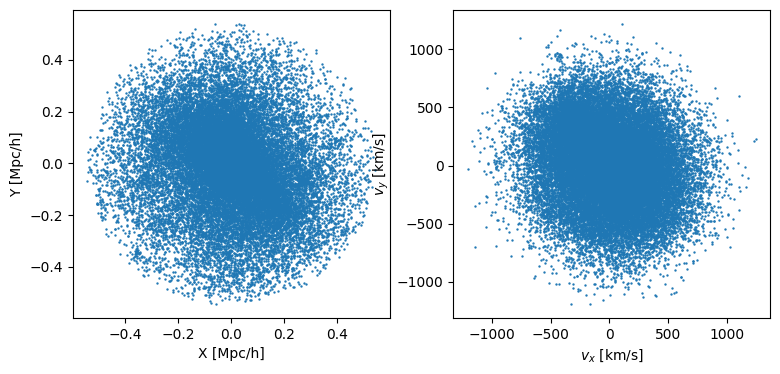

In [4]:
### A example of one halo, position and velocity of particles
pos=snap.pos[ipick]-halo.GroupPos[jpick][10]
vel=snap.vel[ipick]-halo.GroupVel[jpick][10]
r=np.sqrt(pos[:,0]**2+pos[:,1]**2+pos[:,2]**2)
keep_ids=np.where(r<halo.GroupR200[jpick][10])

fig=plt.figure(figsize=(9,4))
ax1=fig.add_subplot(1,2,1)
ax1.scatter(pos[keep_ids][:,0],pos[keep_ids][:,1],s=0.5)
ax1.set_xlabel("X [Mpc/h]")
ax1.set_ylabel("Y [Mpc/h]")

ax2=fig.add_subplot(1,2,2)
plt.scatter(vel[keep_ids][:,0],vel[keep_ids][:,1],s=0.5)
ax2.set_xlabel(r"$v_x$ [km/s]")
ax2.set_ylabel(r"$v_y$ [km/s]")

/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/682506002.py:18: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m),np.log10(np.log(10)*hm.m*hm.dndm), label='Press-Schechter function')


(-5.0, 0.0)

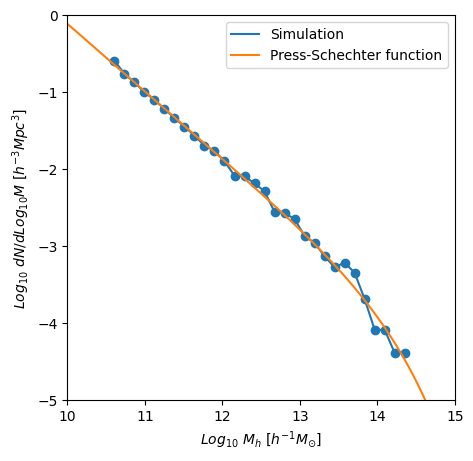

In [5]:
###  Halo mass function
dlm=0.1
numbins=(np.max(np.log10(halo.GroupMass))-np.min(np.log10(halo.GroupMass)))/dlm
(num,lmbins)=np.histogram(np.log10(halo.GroupMass)+10,bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.scatter(lm,ldndlm)
ax.plot(lm,ldndlm, label='Simulation')
ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')

### Press-Schechter function ###
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m),np.log10(np.log(10)*hm.m*hm.dndm), label='Press-Schechter function')

plt.legend(loc='upper right')
ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')
ax.set_xlim((10,15))
ax.set_ylim((-5,0))
# plt.savefig('./figures/halo_mass_function.png')

/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/1092237052.py:31: RuntimeWarning: divide by zero encountered in log10
  ldndlm=np.log10(num/snap.BoxSize**3/dlm)


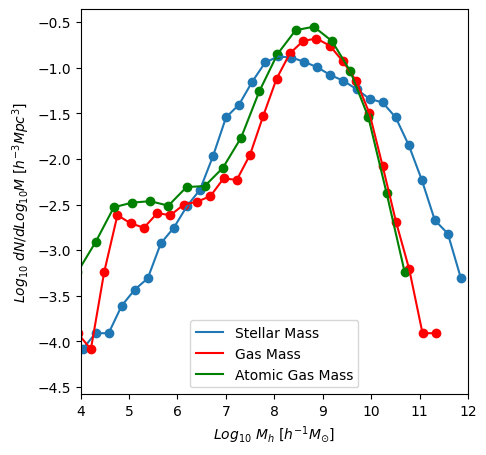

In [6]:
### function of stellar mass, gas mass and atomic gass
dlm=0.1
numbins=(np.max(np.log10(gal.mstar_tot))-np.min(np.log10(gal.mstar_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.mstar_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_xlim([4,12])
ax.scatter(lm,ldndlm)
ax.plot(lm,ldndlm,label='Stellar Mass')
ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')

numbins=(np.max(np.log10(gal.mgas_tot))-np.min(np.log10(gal.mgas_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.mgas_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
ax.scatter(lm,ldndlm,color='red')
ax.plot(lm,ldndlm,color='red',label='Gas Mass')

numbins=(np.max(np.log10(gal.matom_tot))-np.min(np.log10(gal.matom_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.matom_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
ax.scatter(lm,ldndlm,color='green')
ax.plot(lm,ldndlm,color='green',label='Atomic Gas Mass')
plt.legend()
# plt.savefig('./figures/multiple_mass.png')


/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/605661285.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(P_M200)+10,np.log10(P_Msigma)+10,color="red",s=8,label='particles')
/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/605661285.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(G_M200)+10,np.log10(G_Msigma)+10,color="blue",s=8,label='galaxies')
/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/605661285.py:18: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(S_M200)+10,np.log10(S_Msigma)+10,color="orange",s=8,label='subhalos')


8613 8613 8613
839 32 31


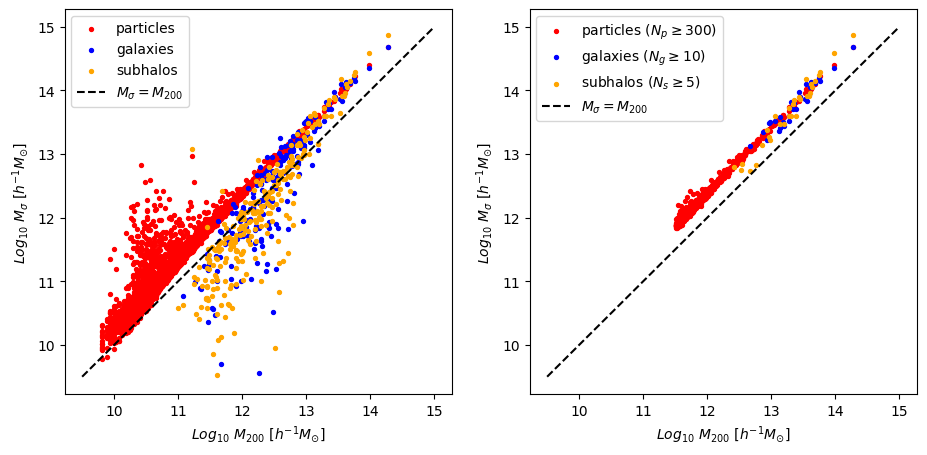

In [7]:
P = np.loadtxt('./results/Particle2040.txt',  skiprows=1)
G = np.loadtxt('./results/Galaxy2040.txt',  skiprows=1)
S = np.loadtxt('./results/Subhalo2040.txt',  skiprows=1)

print(len(P), len(G), len(S))

P_M200=P[:,2]
P_Msigma=P[:,6]
G_M200=G[:,2]
G_Msigma=G[:,6]
S_M200=S[:,2]
S_Msigma=S[:,6]

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
ax.scatter(np.log10(P_M200)+10,np.log10(P_Msigma)+10,color="red",s=8,label='particles')
ax.scatter(np.log10(G_M200)+10,np.log10(G_Msigma)+10,color="blue",s=8,label='galaxies')
ax.scatter(np.log10(S_M200)+10,np.log10(S_Msigma)+10,color="orange",s=8,label='subhalos')
ax.set_xlabel(r'$Log_{10}~M_{200}~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~M_{\sigma}~[h^{-1} M_{\odot}]$')

xpoints = np.array([9.5, 15])
ypoints = np.array([9.5, 15])
ax.plot(xpoints, ypoints, color="black", linestyle="--",label=r"$M_{\sigma} = M_{200}$")
plt.legend()

### ---------------------------------------
P300=P[:,1]>=300
PP=P[P300]
G10=G[:,1]>=10
GG=G[G10]
S5=S[:,1]>=5
SS=S[S5]
print(len(PP), len(GG), len(SS))

P_M200=PP[:,2]
P_Msigma=PP[:,6]
G_M200=GG[:,2]
G_Msigma=GG[:,6]
S_M200=SS[:,2]
S_Msigma=SS[:,6]

ax=fig.add_subplot(1,2,2)
ax.scatter(np.log10(P_M200)+10,np.log10(P_Msigma)+10,color="red",s=8,label=r"particles ($N_p \geq 300$)")
ax.scatter(np.log10(G_M200)+10,np.log10(G_Msigma)+10,color="blue",s=8,label=r"galaxies ($N_g \geq 10$)")
ax.scatter(np.log10(S_M200)+10,np.log10(S_Msigma)+10,color="orange",s=8,label=r"subhalos ($N_s \geq 5$)")
ax.set_xlabel(r'$Log_{10}~M_{200}~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~M_{\sigma}~[h^{-1} M_{\odot}]$')

xpoints = np.array([9.5, 15])
ypoints = np.array([9.5, 15])
ax.plot(xpoints, ypoints, color="black", linestyle="--",label=r"$M_{\sigma} = M_{200}$")
plt.legend()

# plt.savefig('./figures/Msigma_M200.png')

/Users/zhangming/opt/anaconda3/envs/Python38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhangming/opt/anaconda3/envs/Python38/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/zhangming/opt/anaconda3/envs/Python38/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zhangming/opt/anaconda3/envs/Python38/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/zhangming/opt/anaconda3/envs/Python38/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

(-3.0, -1.0)

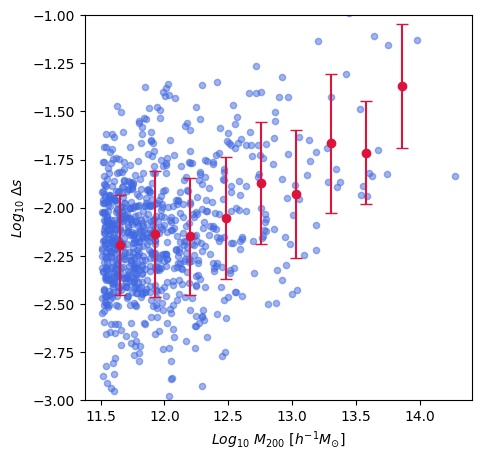

In [8]:
###。the median centre-of-mass offset versus halo mass
P = np.loadtxt('./results/Particle2040.txt',  skiprows=1)
# P300=P[:,1]>=300
# PP=P[P300]
P_M200=PP[:,2]
P_offset=PP[:,8]

x = np.log10(PP[:,2])+10
y = np.log10(PP[:,8])
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.scatter(x, y, s=20, color='royalblue', alpha=0.5)
ax.errorbar((bin_edges[1:] + bin_edges[:-1])/2, bin_means, yerr=bin_stds, fmt='o', color='crimson',capsize=4)
ax.set_xlabel(r'$Log_{10}~M_{200}~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\Delta s$')
ax.set_ylim([-3,-1])
# ax.set_title('the median centre-of-mass offset versus halo mass')
# plt.savefig('./figures/Ds_M200.png')

(0.6, 1.2)

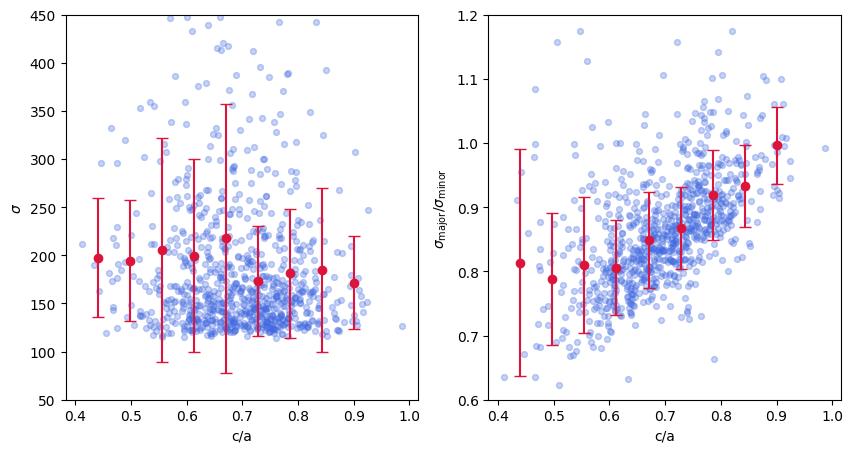

In [9]:
# P = np.loadtxt('./results/particle2040.txt',  skiprows=1)
# P300=P[:,1]>=300
# PP=P[P300]
Sigma=PP[:,5]
a_major = PP[:,10]
c_minor = PP[:,12]
sigma_major = PP[:,13]
sigma_minor = PP[:,15]
M200 = PP[:,2]
Msigma = PP[:,6]

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,2,1)
x = c_minor/a_major
y = Sigma
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

ax.scatter(x, y, s=18, color='royalblue', alpha=0.3)
ax.errorbar((bin_edges[1:] + bin_edges[:-1])/2, bin_means, yerr=bin_stds, fmt='o', color='crimson',capsize=4)
ax.set_xlabel(r'c/a')
ax.set_ylabel(r'$\sigma$')
ax.set_ylim(50,450)

#----------------------------------------------
ax=fig.add_subplot(1,2,2)
x = c_minor/a_major
y = sigma_minor/sigma_major

num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

ax.scatter(x, y, s=18, color='royalblue', alpha=0.3)
ax.errorbar((bin_edges[1:] + bin_edges[:-1])/2, bin_means, yerr=bin_stds, fmt='o', color='crimson',capsize=4)
ax.set_xlabel(r'c/a')
ax.set_ylabel(r'$\sigma_{\rm{major}}/\sigma_{\rm{minor}}$')
ax.set_ylim(0.6,1.2)
# plt.savefig('./figures/axial_ratio.png')

Text(0, 0.5, 'Density')

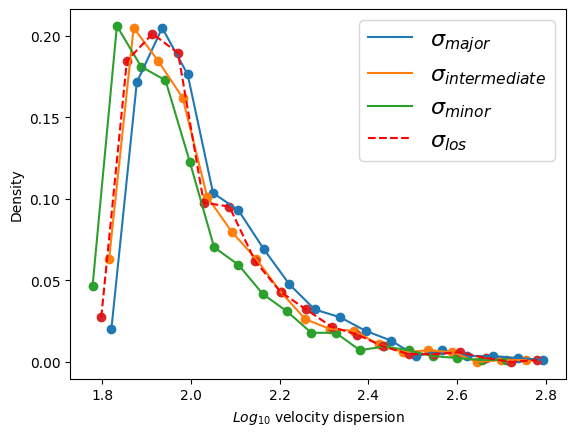

In [10]:
y1 = PP[:,13]
y2 = PP[:,14]
y3 = PP[:,15]
y4 = PP[:,7]
hist1, bins1 = np.histogram(np.log10(y1), bins=18)
density1 = hist1 / float(hist1.sum())
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2
plt.scatter(bin_centers1, density1)
plt.plot(bin_centers1, density1, label=r'$\sigma_{major}$')

hist2, bins2 = np.histogram(np.log10(y2), bins=18)
density2 = hist2 / float(hist2.sum())
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2
plt.scatter(bin_centers2, density2)
plt.plot(bin_centers2, density2, label=r'$\sigma_{intermediate}$')

hist3, bins3 = np.histogram(np.log10(y3), bins=18)
density3 = hist3 / float(hist3.sum())
bin_centers3 = (bins3[:-1] + bins3[1:]) / 2
plt.scatter(bin_centers3, density3)
plt.plot(bin_centers3, density3, label=r'$\sigma_{minor}$')

hist4, bins4 = np.histogram(np.log10(y4), bins=18)
density4 = hist4 / float(hist4.sum())
bin_centers4 = (bins4[:-1] + bins4[1:]) / 2
plt.scatter(bin_centers4, density4)
plt.plot(bin_centers4, density4, 'r--', label=r'$\sigma_{los}$')

plt.legend(fontsize=16)
plt.xlabel('$Log_{10}$ velocity dispersion')
plt.ylabel('Density')
# plt.savefig('./figures/Density_velocity.png')

/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/1998672332.py:32: RuntimeWarning: divide by zero encountered in log10
  bin_stds = [np.std(np.log10(alpha03)[np.where((bin_indices == i) & (np.isfinite(np.log10(alpha03))))]) for i in range(1, num_bins+1)]
/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/1998672332.py:32: RuntimeWarning: invalid value encountered in log10
  bin_stds = [np.std(np.log10(alpha03)[np.where((bin_indices == i) & (np.isfinite(np.log10(alpha03))))]) for i in range(1, num_bins+1)]
/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/1998672332.py:40: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(halo_mass)+10, np.log10(alpha03)+10, color='royalblue', alpha=0.1)
/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/1998672332.py:40: RuntimeWarning: invalid value encountered in log10
  ax.scatter(np.log10(halo_mass)+10, np.log10(alpha03)+10, color='royalblue', alpha=0.1)


<ErrorbarContainer object of 3 artists>

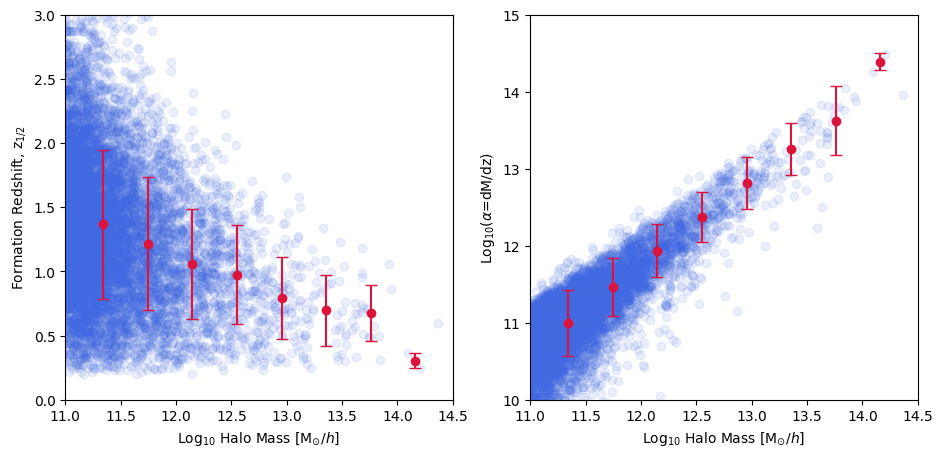

In [24]:
P = np.loadtxt('./results/formation.txt',  skiprows=1)
# halo_mass = P[:,0][np.where(P[:,5]!=0)]
# formation_redshift = P[:,5][np.where(P[:,5]!=0)]
# alpha03 = P[:,6][np.where(P[:,5]!=0)]
# halo_vd = P[:,2][np.where(P[:,5]!=0)]

halo_mass = P[:,0][np.where(P[:,5]>0.2)]
formation_redshift = P[:,5][np.where(P[:,5]>0.2)]
alpha03 = P[:,6][np.where(P[:,5]>0.2)]
halo_vd = P[:,2][np.where(P[:,5]>0.2)]

x = np.log10(halo_mass)+10
y = formation_redshift

num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
ax.set_ylim([0,3])
ax.set_xlim([11,14.5])
ax.set_ylabel(r"Formation Redshift, z$_{1/2}$")
ax.set_xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}/h$]")
ax.scatter(np.log10(halo_mass)+10,formation_redshift, color='royalblue', alpha=0.1)
ax.errorbar((bin_edges[1:] + bin_edges[:-1])/2, bin_means, yerr=bin_stds, fmt='o', color='crimson',capsize=4)

bin_means = [np.mean(alpha03[bin_indices == i]) for i in range(1, num_bins+1)]
# bin_stds = [np.std(np.log10(alpha03)[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(np.log10(alpha03)[np.where((bin_indices == i) & (np.isfinite(np.log10(alpha03))))]) for i in range(1, num_bins+1)]

ax=fig.add_subplot(1,2,2)
ax.set_ylim([10,15])
ax.set_xlim([11,14.5])
ax.set_ylabel(r"Log$_{10}(\alpha$=dM/dz)")
ax.set_xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}/h$]")

ax.scatter(np.log10(halo_mass)+10, np.log10(alpha03)+10, color='royalblue', alpha=0.1) 
ax.errorbar((bin_edges[1:] + bin_edges[:-1])/2, np.log10(bin_means)+10, yerr=bin_stds, fmt='o', color='crimson',capsize=4)
# plt.savefig('./figures/formation_slope.png')

3 106 999 7590 6030


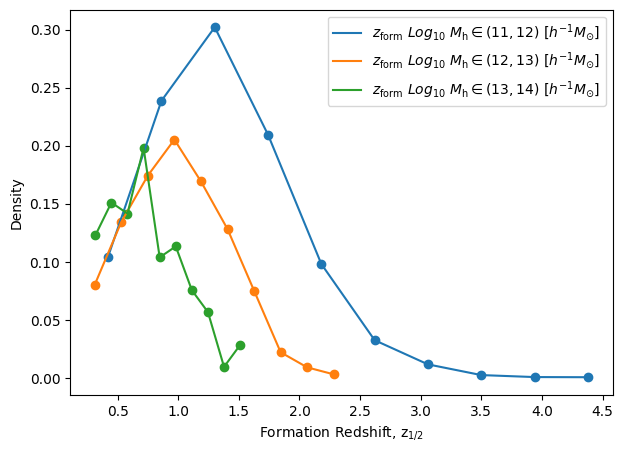

In [25]:
z_M1415 = y[np.logical_and(x>=14, x<15)]
z_M1314 = y[np.logical_and(x>=13, x<14)]
z_M1213 = y[np.logical_and(x>=12, x<13)]
z_M1112 = y[np.logical_and(x>=11, x<12)]
z_M1011 = y[np.logical_and(x>=10, x<11)]
print(len(z_M1415), len(z_M1314), len(z_M1213), len(z_M1112), len(z_M1011))

# hist1, bins1 = np.histogram(z_M1011, bins=25)
# density1 = hist1 / float(hist1.sum())
# bin_centers1 = (bins1[:-1] + bins1[1:]) / 2
# plt.scatter(bin_centers1, density1)
# plt.plot(bin_centers1, density1, label=r'$z_{\rm form}~Log_{10}~M_{\rm h}\in (10,11)~[h^{-1} M_{\odot}]$')
plt.figure(figsize=(7,5))
hist2, bins2 = np.histogram(z_M1112, bins=10)
density2 = hist2 / float(hist2.sum())
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2
plt.scatter(bin_centers2, density2)
plt.plot(bin_centers2, density2, label=r'$z_{\rm form}~Log_{10}~M_{\rm h}\in (11,12)~[h^{-1} M_{\odot}]$')

hist3, bins3 = np.histogram(z_M1213, bins=10)
density3 = hist3 / float(hist3.sum())
bin_centers3 = (bins3[:-1] + bins3[1:]) / 2
plt.scatter(bin_centers3, density3)
plt.plot(bin_centers3, density3, label=r'$z_{\rm form}~Log_{10}~M_{\rm h}\in (12,13)~[h^{-1} M_{\odot}]$')

hist4, bins4 = np.histogram(z_M1314, bins=10)
density4 = hist4 / float(hist4.sum())
bin_centers4 = (bins4[:-1] + bins4[1:]) / 2
plt.scatter(bin_centers4, density4)
plt.plot(bin_centers4, density4, label=r'$z_{\rm form}~Log_{10}~M_{\rm h}\in (13,14)~[h^{-1} M_{\odot}]$')

# hist5, bins5 = np.histogram(z_M1415, bins=25)
# density5 = hist5 / float(hist5.sum())
# bin_centers5 = (bins5[:-1] + bins5[1:]) / 2
# plt.scatter(bin_centers5, density5)
# plt.plot(bin_centers5, density5, label=r'$z_{\rm form}~Log_{10}~M_{\rm h}\in (14,15)~[h^{-1} M_{\odot}]$')
plt.xlabel(r"Formation Redshift, z$_{1/2}$")
plt.ylabel(r"Density")
plt.legend()
# plt.savefig('./figures/zform_distribution.png')

/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/1878964945.py:13: RuntimeWarning: divide by zero encountered in log10
  a= ax.scatter(x,np.log10(halo_vd**2),c=np.log10(alpha03*1e10), norm=norm2, s=10,  cmap=cm)#, alpha=0.2,norm=mcolors.LogNorm() norm=norm2
/var/folders/n4/5b_h5xtn7pq9q71bwwqvzdc00000gn/T/ipykernel_26500/1878964945.py:13: RuntimeWarning: invalid value encountered in log10
  a= ax.scatter(x,np.log10(halo_vd**2),c=np.log10(alpha03*1e10), norm=norm2, s=10,  cmap=cm)#, alpha=0.2,norm=mcolors.LogNorm() norm=norm2


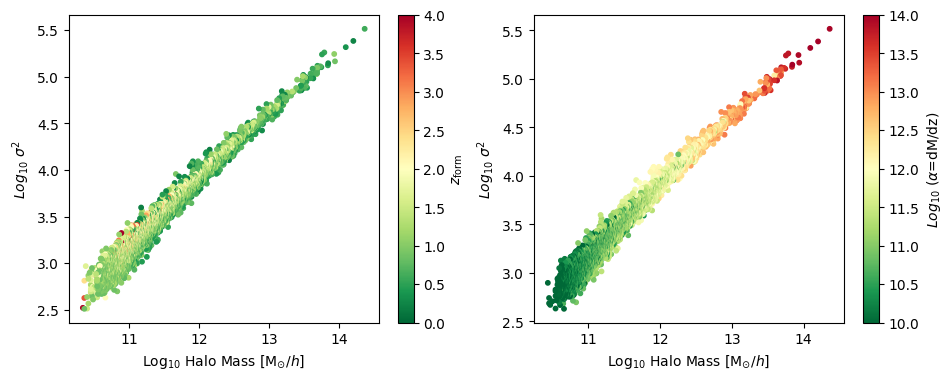

In [26]:
fig=plt.figure(figsize=(11,4))
ax=fig.add_subplot(1,2,1)
cm = plt.colormaps.get_cmap("RdYlGn_r")
norm2 = mcolors.Normalize(vmin=0, vmax=4)
a= ax.scatter(x,np.log10(halo_vd**2),c=y, norm=norm2,s=10,  cmap=cm)#norm=mcolors.LogNorm(),, alpha=0.2
ax.set_xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}/h$]")
ax.set_ylabel(r'$Log_{10}~{\sigma^2}$')
c=plt.colorbar(a)
c.set_label(r"$z_{\rm{form}}$")

ax=fig.add_subplot(1,2,2)
norm2 = mcolors.Normalize(vmin=10, vmax=14)
a= ax.scatter(x,np.log10(halo_vd**2),c=np.log10(alpha03*1e10), norm=norm2, s=10,  cmap=cm)#, alpha=0.2,norm=mcolors.LogNorm() norm=norm2
ax.set_xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}/h$]")
ax.set_ylabel(r'$Log_{10}~{\sigma^2}$')
c=plt.colorbar(a)
c.set_label(r"$Log_{10}~(\alpha$=dM/dz)")
# plt.savefig('./figures/mass_v_zform_alpha.png')